In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keila_wrangle as w

In [23]:
# get dataset
df = w.read_wine()

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
def clean_wine():
    # get datasets 
    df = read_wine()
    
    # categorize quality into high_quality and low quality 
    
    # remove outliers -- removed outliers outside of 4 standard deviation
    df = remove_outliers(df, 'wine_type')
    
    # fix names for columns
    new_col_name = []
    
    for col in df.columns:
        new_col_name.append(col.lower().replace(' ', '_'))

    df.columns = new_col_name

    # split data 
    train, validate, test = split_data(df, "quality")
    
    return train, validate, test


In [33]:
df.quality.value_counts()

6    1655
5    1241
7     638
4     121
8     113
3      11
9       3
Name: quality, dtype: int64

In [2]:
df, _, _= w.clean_wine()

46 outliers removed from fixed acidity.
26 outliers removed from volatile acidity.
11 outliers removed from citric acid.
5 outliers removed from residual sugar.
63 outliers removed from chlorides.
15 outliers removed from free sulfur dioxide.
2 outliers removed from total sulfur dioxide.
0 outliers removed from density.
4 outliers removed from pH.
21 outliers removed from sulphates.
0 outliers removed from alcohol.
0 outliers removed from quality.
0 outliers removed from red_wine.

Total of 193 outliers removed.


In [3]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,wine_type,quality_type
1961,9.5,0.21,0.47,1.30,0.039,21.0,123.0,0.99590,2.90,0.64,9.5,5,0,white,medium
2604,6.7,0.30,0.29,2.80,0.025,37.0,107.0,0.99159,3.31,0.63,11.3,7,0,white,high
890,5.0,0.31,0.00,6.40,0.046,43.0,166.0,0.99400,3.30,0.63,9.9,6,0,white,medium
3024,7.0,0.13,0.37,12.85,0.042,36.0,105.0,0.99581,3.05,0.55,10.7,6,0,white,medium
925,8.6,0.22,0.36,1.90,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7,1,red,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,6.3,0.67,0.48,12.60,0.052,57.0,222.0,0.99790,3.17,0.52,9.3,6,0,white,medium
2088,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,6,0,white,medium
4508,5.8,0.26,0.30,2.60,0.034,75.0,129.0,0.99020,3.20,0.38,11.5,4,0,white,low
4740,6.0,0.32,0.46,1.50,0.050,56.0,189.0,0.99308,3.24,0.49,9.6,5,0,white,medium


In [36]:
# 3,4,5 
df[(df.quality == 3) | (df.quality == 4)]

# 6,7 
df[(df.quality == 5) | (df.quality == 6) | (df.quality == 7)]

# 8,9 
df["quality"] = df[(df.quality == 8) | (df.quality == 9)].rename

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,wine_type
1961,9.5,0.210,0.47,1.3,0.039,21.0,123.0,0.99590,2.90,0.64,9.5,5,0,white
2524,7.5,0.410,0.23,14.8,0.054,28.0,174.0,0.99898,3.18,0.49,9.7,5,0,white
4007,6.4,0.250,0.57,1.0,0.062,21.0,122.0,0.99238,3.00,0.40,9.5,5,0,white
3523,6.0,0.230,0.15,9.7,0.048,101.0,207.0,0.99571,3.05,0.30,9.1,5,0,white
937,6.1,0.360,0.58,15.0,0.044,42.0,115.0,0.99780,3.15,0.51,9.0,5,0,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,6.0,0.160,0.30,6.7,0.043,43.0,153.0,0.99510,3.63,0.46,10.6,5,0,white
210,5.6,0.245,0.25,9.7,0.032,12.0,68.0,0.99400,3.31,0.34,10.5,5,0,white
1354,7.8,0.130,0.30,1.8,0.040,43.0,179.0,0.99550,3.43,0.41,9.0,5,0,white
4508,5.8,0.260,0.30,2.6,0.034,75.0,129.0,0.99020,3.20,0.38,11.5,4,0,white


In [48]:
df['quality_type'] = df['quality'].replace({3: 'low', 4: 'low', 5: 'medium', 6: 'medium', 7: 'high', 8: 'high', 9: 'high'})


In [49]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,wine_type,quality_type
1961,9.5,0.21,0.47,1.30,0.039,21.0,123.0,0.99590,2.90,0.64,9.5,5,0,white,medium
2604,6.7,0.30,0.29,2.80,0.025,37.0,107.0,0.99159,3.31,0.63,11.3,7,0,white,high
890,5.0,0.31,0.00,6.40,0.046,43.0,166.0,0.99400,3.30,0.63,9.9,6,0,white,medium
3024,7.0,0.13,0.37,12.85,0.042,36.0,105.0,0.99581,3.05,0.55,10.7,6,0,white,medium
925,8.6,0.22,0.36,1.90,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7,1,red,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,6.3,0.67,0.48,12.60,0.052,57.0,222.0,0.99790,3.17,0.52,9.3,6,0,white,medium
2088,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,6,0,white,medium
4508,5.8,0.26,0.30,2.60,0.034,75.0,129.0,0.99020,3.20,0.38,11.5,low,0,white,low
4740,6.0,0.32,0.46,1.50,0.050,56.0,189.0,0.99308,3.24,0.49,9.6,5,0,white,medium


In [26]:
# cleaning data
train, validate, test = w.clean_wine()

46 outliers removed from fixed acidity.
26 outliers removed from volatile acidity.
11 outliers removed from citric acid.
5 outliers removed from residual sugar.
63 outliers removed from chlorides.
15 outliers removed from free sulfur dioxide.
2 outliers removed from total sulfur dioxide.
0 outliers removed from density.
4 outliers removed from pH.
21 outliers removed from sulphates.
0 outliers removed from alcohol.
0 outliers removed from quality.
0 outliers removed from red_wine.

Total of 193 outliers removed.


In [25]:
# found no nulls 
df[df.isnull()].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
red_wine                0.0
wine_type                 0
dtype: object

SUMMARY REPORT
          
          
Dataframe head: 
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1961            9.5              0.21         0.47             1.3      0.039   
2604            6.7              0.30         0.29             2.8      0.025   
890             5.0              0.31         0.00             6.4      0.046   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
1961                 21.0                 123.0  0.99590  2.90       0.64   
2604                 37.0                 107.0  0.99159  3.31       0.63   
890                  43.0                 166.0  0.99400  3.30       0.63   

      alcohol  quality  red_wine wine_type  
1961      9.5        5         0     white  
2604     11.3        7         0     white  
890       9.9        6         0     white  
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3782 entries, 1961 to 1028
Data 

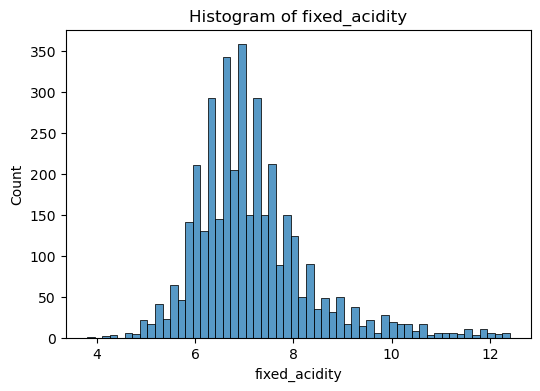

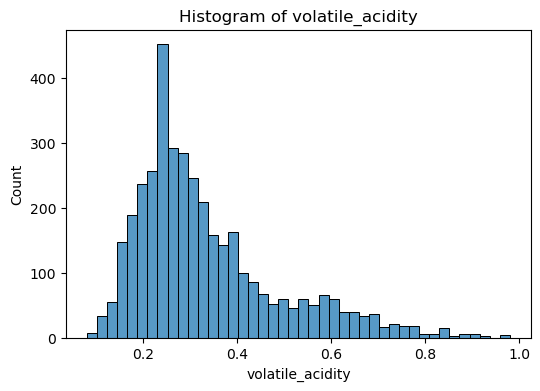

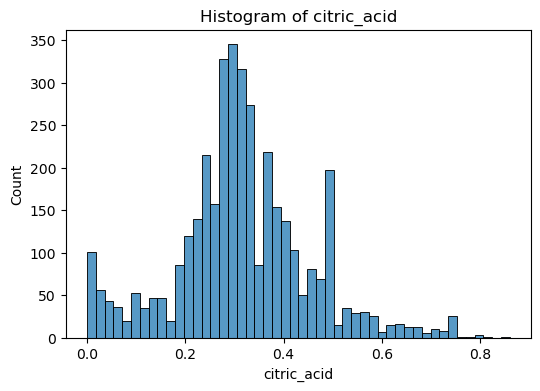

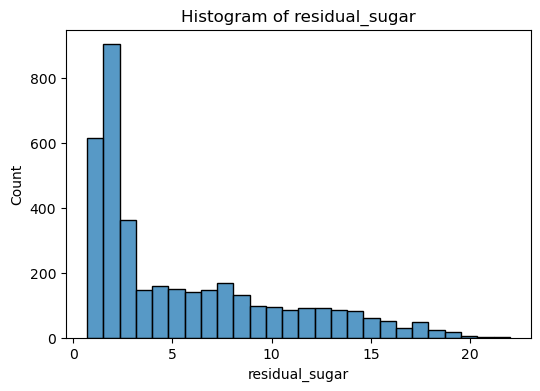

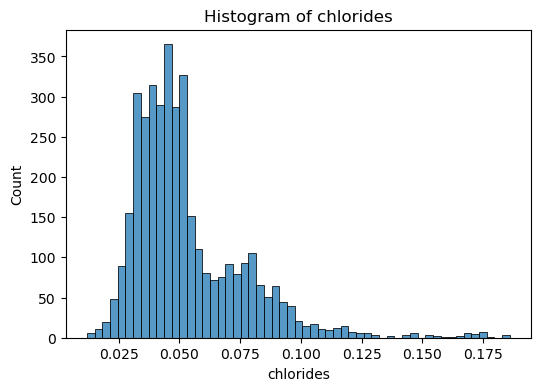

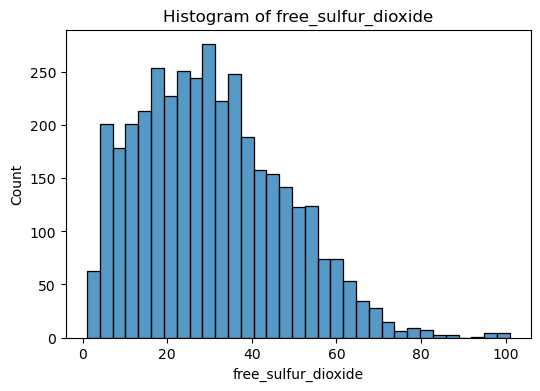

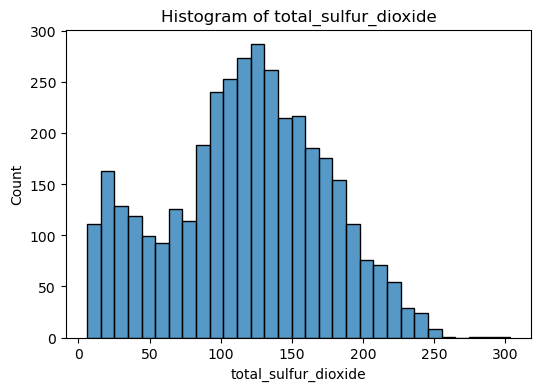

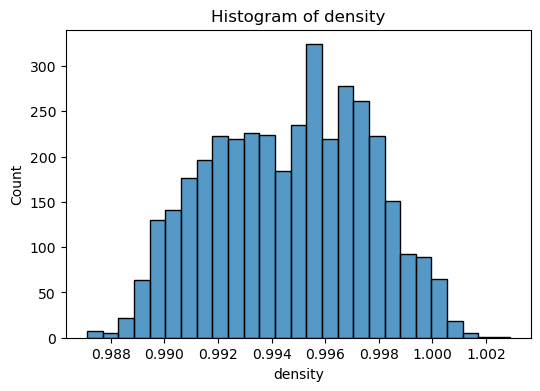

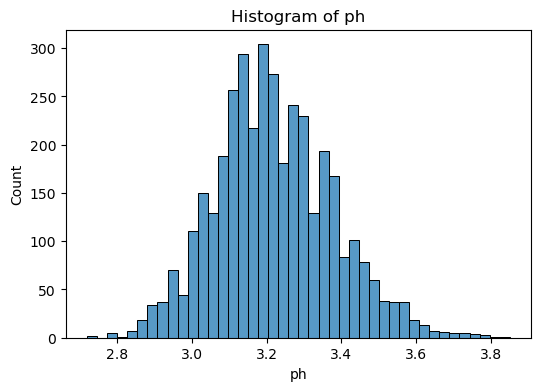

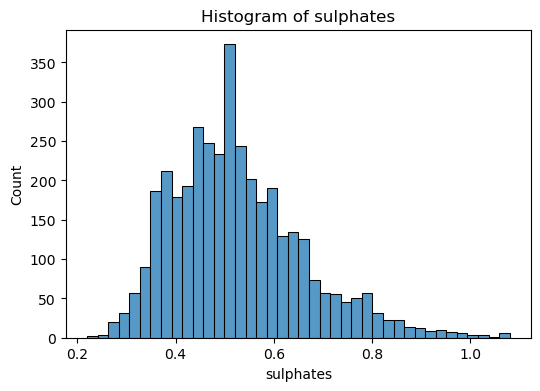

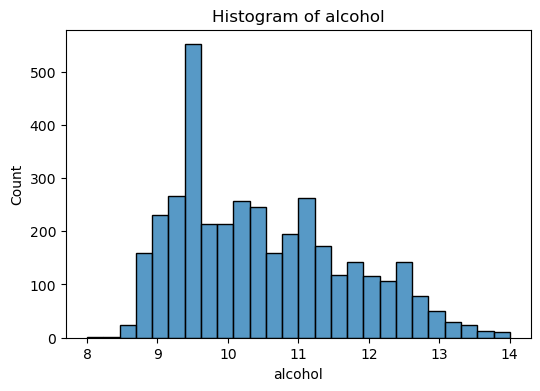

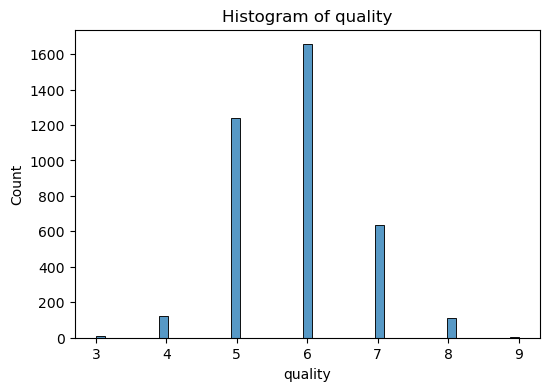

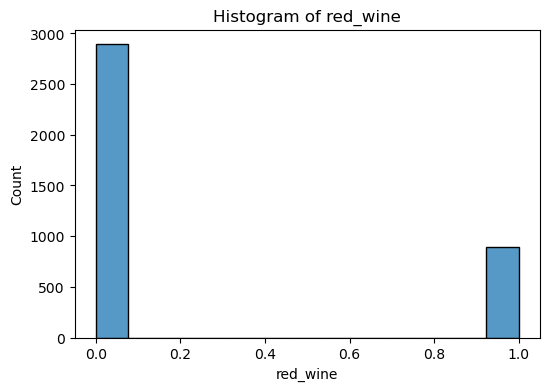

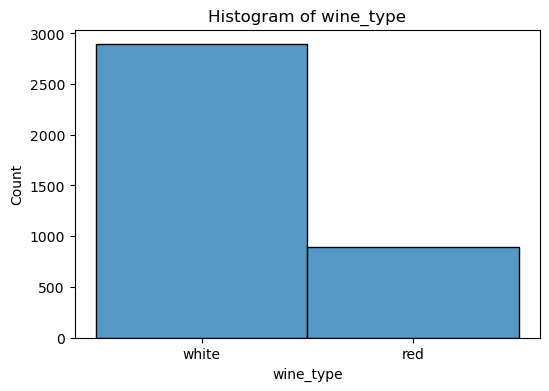

In [34]:
w.summarize(train)

In [27]:
# splitting into x and y
target = "quality"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3782, 14)
validate -> (1261, 14)
test -> (1261, 14)


In [28]:
# scaling data
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)

In [29]:
x_train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
0,0.662791,0.144444,0.546512,0.028169,0.155172,0.20,0.393939,0.557034,0.159292,0.488372,0.250000,0.0
1,0.337209,0.244444,0.337209,0.098592,0.074713,0.36,0.340067,0.283904,0.522124,0.476744,0.550000,0.0
2,0.139535,0.255556,0.000000,0.267606,0.195402,0.42,0.538721,0.436629,0.513274,0.476744,0.316667,0.0
3,0.372093,0.055556,0.430233,0.570423,0.172414,0.35,0.333333,0.551331,0.292035,0.383721,0.450000,0.0
4,0.558140,0.155556,0.418605,0.056338,0.298851,0.52,0.239057,0.565906,0.663717,0.755814,0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0.290698,0.655556,0.558140,0.558685,0.229885,0.56,0.727273,0.683777,0.398230,0.348837,0.216667,0.0
3778,0.569767,0.077778,0.348837,0.042254,0.195402,0.28,0.417508,0.449303,0.442478,0.186047,0.300000,0.0
3779,0.232558,0.200000,0.348837,0.089202,0.126437,0.74,0.414141,0.195817,0.424779,0.186047,0.583333,0.0
3780,0.255814,0.266667,0.534884,0.037559,0.218391,0.55,0.616162,0.378327,0.460177,0.313953,0.266667,0.0


* sulphates, density, total sulfur dioxide, free sulfur dioxide, chlorides, residual sugar, citric acid, volatile acidity   has outliers

In [30]:
train, validate, test = w.clean_wine()

46 outliers removed from fixed acidity.
26 outliers removed from volatile acidity.
11 outliers removed from citric acid.
5 outliers removed from residual sugar.
63 outliers removed from chlorides.
15 outliers removed from free sulfur dioxide.
2 outliers removed from total sulfur dioxide.
0 outliers removed from density.
4 outliers removed from pH.
21 outliers removed from sulphates.
0 outliers removed from alcohol.
0 outliers removed from quality.
0 outliers removed from red_wine.

Total of 193 outliers removed.


In [31]:
target = "quality"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3782, 14)
validate -> (1261, 14)
test -> (1261, 14)


In [32]:
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)


In [33]:
x_train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
0,0.662791,0.144444,0.546512,0.028169,0.155172,0.20,0.393939,0.557034,0.159292,0.488372,0.250000,0.0
1,0.337209,0.244444,0.337209,0.098592,0.074713,0.36,0.340067,0.283904,0.522124,0.476744,0.550000,0.0
2,0.139535,0.255556,0.000000,0.267606,0.195402,0.42,0.538721,0.436629,0.513274,0.476744,0.316667,0.0
3,0.372093,0.055556,0.430233,0.570423,0.172414,0.35,0.333333,0.551331,0.292035,0.383721,0.450000,0.0
4,0.558140,0.155556,0.418605,0.056338,0.298851,0.52,0.239057,0.565906,0.663717,0.755814,0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0.290698,0.655556,0.558140,0.558685,0.229885,0.56,0.727273,0.683777,0.398230,0.348837,0.216667,0.0
3778,0.569767,0.077778,0.348837,0.042254,0.195402,0.28,0.417508,0.449303,0.442478,0.186047,0.300000,0.0
3779,0.232558,0.200000,0.348837,0.089202,0.126437,0.74,0.414141,0.195817,0.424779,0.186047,0.583333,0.0
3780,0.255814,0.266667,0.534884,0.037559,0.218391,0.55,0.616162,0.378327,0.460177,0.313953,0.266667,0.0
